# Data Gems 💎

---


**Presentacion:**

https://www.canva.com/design/DAGMwLPFrqY/ymTu2TE6d3WWwJ4nQ0xxMw/edit?utm_content=DAGMwLPFrqY&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton

## **Análisis de ventas de hipermercados** 📊
### **Abstact**

Este proyecto tiene como objetivo analizar los datos de ventas de la tienda SuperStore para identificar patrones y tendencias que puedan mejorar la toma de decisiones comerciales. Utilizando herramientas avanzadas de análisis de datos, nuestro equipo se propone optimizar las estrategias de ventas y maximizar los ingresos.
### **Contexto Comercial 🛒**
SuperStore se enfrenta al desafío de mejorar sus estrategias de ventas mediante el análisis de datos históricos. Nuestro equipo, compuesto por analistas de datos y consultores especializados, es responsable de llevar a cabo este análisis utilizando Python.
Nuestro proyecto consistirá en identificar los puntos clave que pueden optimizar el rendimiento de ventas de la tienda, basándonos en los datos recopilados de las transacciones de ventas.
Para este análisis, utilizaremos los datos disponibles en la base de datos, que contienen información detallada sobre pedidos, clientes, productos y regiones.
### **Problema Comercial 🔍**
¿Cómo evolucionan las ventas mensuales por categoría de producto a lo largo del tiempo?

¿Qué productos generan más y menos ingresos?

¿Cuál es el comportamiento de los clientes en diferentes segmentos?

¿Qué regiones tienen el mayor número de ventas?



### **Objetivo 🎯**
Nuestro objetivo es generar un modelo de análisis de datos que permita predecir y comprender mejor las ventas futuras, optimizando así las estrategias comerciales de SuperStore. Esto incluye identificar los productos y regiones más rentables, comprender el comportamiento del cliente y mejorar la eficiencia del envío.


## **Importacion de datos** 📥

---



In [ ]:
#IMPORTANDO LAS LIBRERIAS
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Cargar la base de datos** 🗂️

In [ ]:
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Con este codigo se trae el dataset de drive

In [ ]:
file_path='/content/drive/MyDrive/DataGems🌸/data_set_final.csv'
df=pd.read_csv(file_path, encoding='latin-1') # encoding='iso-8859-1' encoding='cp1252'


In [ ]:
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


*El conjunto de datos muestra los primeros registros del dataset de ventas, detallando pedidos con fechas, métodos de envío, información del cliente,productos entre otros.*

# **Limpieza y preparacion de datos** 🛠️

---



**Explorar el conjunto de datos**

In [ ]:
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


*El conjunto de datos muestra los primeros registros del dataset de ventas, detallando pedidos con fechas, métodos de envío, información del cliente,productos entre otros.*

In [ ]:
df.tail()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,9797,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,9798,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,9799,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376
9799,9800,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


*El conjunto de datos muestra los ultimos registros del dataset de ventas, detallando pedidos con fechas, métodos de envío, información del cliente,productos entre otros.*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

*El comando df.info() revela que el dataset de ventas de SuperStore tiene 9,800 registros y 18 columnas. La mayoría de las columnas están completas, aunque Postal_Code tiene algunos valores nulos. Las columnas abarcan información sobre pedidos, clientes, productos y ventas, con tipos de datos que incluyen enteros, flotantes y objetos. Esta estructura permitirá un análisis detallado para optimizar estrategias comerciales.*

In [ ]:
df.describe()

,Row_ID,Postal_Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


*El comando df.describe() proporciona un resumen estadístico del dataset:*

* *Row_ID: Va de 1 a 9,800, con una media de 4,900.5 y una desviación estándar de 2,829.2.*
* *Postal_Code: Varía de 1,040 a 99,301, con una media de 55,273.3 y una desviación estándar de 32,041.2. Hay algunos valores nulos.*
* *Sales: Rango de ventas desde 0.44 hasta 22,638.48, con una media de 230.77 y una desviación estándar alta de 626.65. El 25% de las ventas están por debajo de 17.25, el 50% (mediana) en 54.49 y el 75% en 210.61.*

*Esto indica una gran variabilidad en las ventas, con algunos valores extremadamente altos en comparación con la mayoría de los datos.*

**Identificar y manejar valores faltantes**

In [ ]:
df.isnull().sum()

,0
Row_ID,0
Order_ID,0
Order_Date,0
Ship_Date,0
Ship_Mode,0
Customer_ID,0
Customer_Name,0
Segment,0
Country,0
City,0


*El comando df.isnull().sum() muestra que el dataset tiene 11 valores nulos en la columna Postal_Code, mientras que todas las demás columnas no tienen valores nulos.*

**Manejar valores faltantes**

In [ ]:
#Eliminar filas con valores faltantes
df=df.dropna()
#Rellenar valores faltantes
#df=df.fillna(method='ffill')

*El comando df.dropna() elimina todas las filas que contienen valores nulos en el dataset. Como resultado, se han eliminado las 11 filas que tenían valores faltantes en la columna Postal_Code, dejando el dataset sin ningún valor nulo.*

**Convertir los tipos de datos a los formatos adecuados**

In [ ]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%d/%m/%Y')
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], format='%d/%m/%Y')
#Convertir el float en int
df['Postal_Code'] = df['Postal_Code'].astype(int)
#limitar el numero de decimales a 2 en sales
df['Sales'] = df['Sales'].round(2)

* *Se ha convertido la columna Order_Date a formato de fecha usando pd.to_datetime(). Sin embargo, la conversión para Ship_Date parece estar usando el formato de Order_Date por error; debería ser df['Ship_Date'] en lugar de df['Order_Date']. *

* *La columna Postal_Code se ha convertido de tipo float a int para que no contenga decimales.*

* *La columna Sales se ha redondeado a dos decimales para simplificar los valores y mejorar la presentación.*

**Eliminar columnas irrelevantes**

In [ ]:
df=df.drop(columns=['Row_ID'])

*El comando df.drop(columns=['Row_ID']) elimina la columna Row_ID del dataset. Esto se realiza para limpiar el conjunto de datos al eliminar una columna que no es necesaria para el análisis.*

In [ ]:
df

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.80
9796,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.37
9797,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.19
9798,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.38


*El comando df muestra el estado actual del dataset después de todas las transformaciones y modificaciones aplicadas. Esto incluirá:*

* *La eliminación de filas con valores nulos.*
* *La conversión de las columnas de fecha a formato datetime.*
* *La conversión de Postal_Code a tipo int.*
* *La limitación de decimales en Sales a dos.*
* *La eliminación de la columna Row_ID.*

# **NAYELY**
---



## **¿Cómo evolucionan las ventas mensuales por categoría de producto a lo largo del tiempo?** ⏳

### **Analisis y transformacion de datos**

**Analisis Descriptivo de los datos**

In [ ]:
print(df.describe())

                          Order_Date                      Ship_Date  \
count                           9789                           9789   
mean   2017-05-01 02:51:57.866993664  2017-05-05 01:56:03.898253056   
min              2015-01-03 00:00:00            2015-01-07 00:00:00   
25%              2016-05-23 00:00:00            2016-05-27 00:00:00   
50%              2017-06-26 00:00:00            2017-06-29 00:00:00   
75%              2018-05-15 00:00:00            2018-05-19 00:00:00   
max              2018-12-30 00:00:00            2019-01-05 00:00:00   
std                              NaN                            NaN   

        Postal_Code         Sales  
count   9789.000000   9789.000000  
mean   55273.322403    230.116169  
min     1040.000000      0.440000  
25%    23223.000000     17.250000  
50%    58103.000000     54.380000  
75%    90008.000000    210.390000  
max    99301.000000  22638.480000  
std    32041.223413    625.302083  


*El conjunto de datos abarca pedidos entre 2015 y 2018, mostrando un amplio rango de ventas desde 0.44 hasta 22,638.48, con un promedio de 230.12. La desviación estándar alta en ventas indica variabilidad significativa en las transacciones. Las fechas de pedido y envío son consistentes a lo largo del período analizado.*

In [ ]:
df

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.80
9796,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.37
9797,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.19
9798,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.38


**Analizar el comportamiento mensual de las ventas por cada categoría.**

Extrae el mes y el año de "Order_Date" para crear columnas "Mes" y "Año".

In [ ]:
# Extraer año y mes de la fecha de orden
df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.month

#Agrupar por año, mes y categoria de producto
mes_sales = df.groupby(['Year', 'Month', 'Category'])['Sales'].sum().reset_index()
print(mes_sales.head())

   Year  Month         Category    Sales
0  2015      1        Furniture  6217.28
1  2015      1  Office Supplies  4845.14
2  2015      1       Technology  3143.29
3  2015      2        Furniture  1839.66
4  2015      2  Office Supplies  1071.75


*Las ventas están agrupadas por año, mes y categoría de producto. En enero de 2015, las categorías "Furniture" (Muebles) y "Office Supplies" (Material de Oficina) tuvieron las ventas más altas, con 6,217.28 y 4,845.14 respectivamente. "Technology" (Tecnología) tuvo ventas menores, con 3,143.29 .En febrero de 2015, "Furniture" sigue liderando las ventas con 1,839.66, seguido de "Office Supplies" con 1,071.75, lo que indica que la categoría de muebles es consistentemente fuerte en ventas al inicio del año.*

**Analisis descriptivo**

In [ ]:
#Resumen de ventas mensual
mes_sales_summary = mes_sales.describe()
print(mes_sales_summary)

              Year       Month         Sales
count   144.000000  144.000000    144.000000
mean   2016.500000    6.500000  15643.105417
std       1.121936    3.464102   9288.071637
min    2015.000000    1.000000   1071.750000
25%    2015.750000    3.750000   8969.795000
50%    2016.500000    6.500000  12875.520000
75%    2017.250000    9.250000  21620.865000
max    2018.000000   12.000000  49409.100000


* *Las ventas mensuales promedio son de 15,643.11 lo que sugiere un volumen de ventas consistente, aunque con algunas variaciones significativas.*
* *La desviación estándar de 9,288.07 indica una considerable variabilidad en las ventas mensuales, lo que sugiere fluctuaciones significativas de un mes a otro.*
* *Las ventas mensuales varían desde un mínimo de 1,071.75 hasta un máximo de 49,409.10, mostrando la amplitud de las fluctuaciones.*
* *El análisis abarca de 2015 a 2018. El año y el mes medianos son 2016 y junio respectivamente, lo que indica que el centro del rango temporal está en el medio del periodo analizado.*

*Aunque hay una tendencia general en las ventas a mantenerse alrededor del promedio de 15,643, hay meses con ventas excepcionalmente altas que contribuyen a la elevada desviación estándar.*

**Crear nuevas columnas**

In [ ]:
# Ordenar por categoría, año y mes
mes_sales = mes_sales.sort_values(by=['Category', 'Year', 'Month'])

# Calcular cambio porcentual mensual de ventas para cada categoría
mes_sales['Cambio_Mensual'] = mes_sales.groupby('Category')['Sales'].pct_change() * 100

# Reemplazar NaN por 0
mes_sales['Cambio_Mensual'] = mes_sales['Cambio_Mensual'].fillna(0)

# Mostrar algunos resultados
print(mes_sales.head(10))

    Year  Month   Category     Sales  Cambio_Mensual
0   2015      1  Furniture   6217.28        0.000000
3   2015      2  Furniture   1839.66      -70.410533
6   2015      3  Furniture  14243.39      674.240349
9   2015      4  Furniture   7944.83      -44.220933
12  2015      5  Furniture   6912.79      -12.990083
15  2015      6  Furniture  13144.57       90.148551
18  2015      7  Furniture  10821.07      -17.676501
21  2015      8  Furniture   7125.21      -34.154293
24  2015      9  Furniture  23816.48      234.256534
27  2015     10  Furniture  12304.24      -48.337286


*El código ordena las ventas por categoría, año y mes, y calcula el cambio porcentual mensual de las ventas para cada categoría. Los resultados muestran los primeros 10 registros, que pertenecen todos a la categoría "Furniture". Sin embargo, el código está diseñado para calcular el cambio porcentual mensual para todas las categorías.*

In [ ]:
Categoria = "Technology" # @param ['Furniture', 'Office Supplies', 'Technology'] {allow-input: true}
# Para ver datos de una categoría específica
categoria_especifica = mes_sales[mes_sales['Category'] == Categoria]
print(categoria_especifica.head(48))

     Year  Month    Category     Sales  Cambio_Mensual
2    2015      1  Technology   3143.29        0.000000
5    2015      2  Technology   1608.51      -48.827184
8    2015      3  Technology  32359.97     1911.797875
11   2015      4  Technology   8973.15      -72.270833
14   2015      5  Technology   9599.86        6.984281
17   2015      6  Technology   8435.95      -12.124239
20   2015      7  Technology   7839.29       -7.072825
23   2015      8  Technology   8937.06       14.003437
26   2015      9  Technology  30383.73      239.974555
29   2015     10  Technology  11938.02      -60.709169
32   2015     11  Technology  30073.44      151.913131
35   2015     12  Technology  20573.25      -31.589968
38   2016      1  Technology   4518.24      -78.038278
41   2016      2  Technology   3448.97      -23.665631
44   2016      3  Technology  10143.94      194.115055
47   2016      4  Technology  11160.98       10.026085
50   2016      5  Technology  11642.98        4.318617
53   2016 

1. ***Categoría: Technology***

 *Las ventas para la categoría "Technology" muestran una alta volatilidad entre 2015 y 2018, con fluctuaciones significativas en las cifras de ventas mensuales.*

 *Los cambios en las ventas mensuales varían enormemente, con picos de hasta 1,872.36% y caídas de hasta -86.67%. Las ventas alcanzan un máximo de 35,182.58 en diciembre de 2016 y un mínimo de 1,608.51 en febrero de 2015.*

 *La categoría "Technology" presenta un comportamiento de ventas muy variable, con grandes fluctuaciones que pueden ser influenciadas por factores estacionales o eventos específicos.*
2. ***Categoría: Furniture***

 *La categoría "Furniture" también presenta variabilidad en las ventas mensuales a lo largo de los años 2015 a 2018, con ventas que oscilan entre 2,369.88 y 39,278.21.*

 *La categoría muestra un rango amplio de cambios porcentuales en ventas, con aumentos notables como el 365.55% en marzo de 2015 y caídas significativas como el -77.92% en enero de 2018. Las ventas alcanzan un pico de 39,278.21 en diciembre de 2018.*

 *Las ventas en la categoría "Furniture" muestran tanto picos como caídas importantes, lo que sugiere una posible estacionalidad o impacto de eventos especiales en los resultados de ventas.*
3. ***Categoría: Office Supplies***

 *Para la categoría "Office Supplies", las ventas también fluctúan considerablemente, con montos que van desde 2,822.64 hasta 40,056.31 entre 2015 y 2018.*

 *Los cambios porcentuales en las ventas varían ampliamente, con aumentos significativos como el 451.43% en marzo de 2015 y caídas de hasta -83.00% en enero de 2017. Las ventas alcanzan un máximo de 40,056.31 en diciembre de 2017.*

 *La categoría "Office Supplies" presenta un comportamiento de ventas variable, con fluctuaciones que podrían estar relacionadas con la estacionalidad del negocio o eventos específicos durante el período analizado.*

**Agrupar Datos y Aplicar Funciones de Agregación**

Agrupa los datos por "Mes", "Año" y "Category" para calcular las ventas mensuales.

In [ ]:
# Agrupar ventas totales por mes, año y categoría
total_mes_sales = mes_sales.groupby(['Year', 'Month', 'Category'])['Sales'].sum().reset_index()

#Filtrar para mostrar solo categorías con ventas superiores a un umbral
filtrar_sales = total_mes_sales[total_mes_sales['Sales'] > 1000]
print(filtrar_sales.head())

   Year  Month         Category    Sales
0  2015      1        Furniture  6217.28
1  2015      1  Office Supplies  4845.14
2  2015      1       Technology  3143.29
3  2015      2        Furniture  1839.66
4  2015      2  Office Supplies  1071.75


*El análisis muestra las ventas mensuales totales por categoría, destacando aquellas que superan 1,000. Las categorías "Furniture", "Office Supplies" y "Technology" son las que tienen ventas significativas. Por ejemplo, en enero de 2015, "Furniture" generó 6,217.28, "Office Supplies" 4,845.14, y "Technology" 3,143.29 .Estos resultados indican que las ventas en estas categorías son robustas y superan el umbral establecido, proporcionando información útil para evaluar el rendimiento y planificar estrategias de ventas.*

### **Visualización de datos**

####**Gráficos de Líneas**

**Ventas Mensuales por Categoria de Producto de todos los años**

Muestra como evolucionan las ventas para cada categoría a lo largo del tiempo.

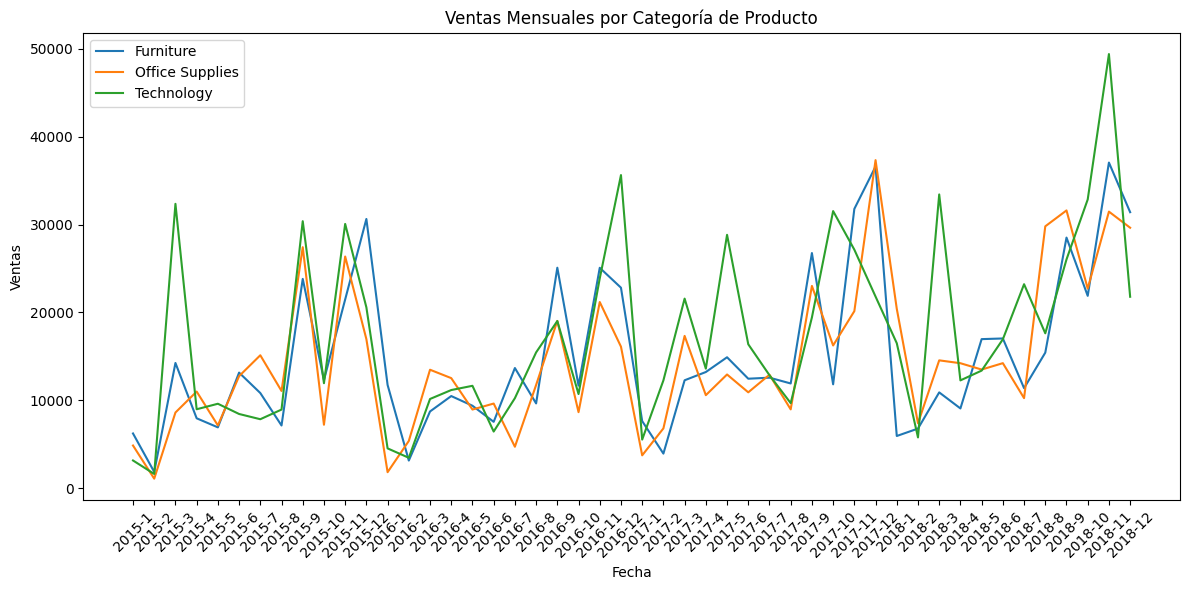

In [ ]:
#Ventas a lo largo del tiempo por categoría
plt.figure(figsize=(12, 6))
for category in mes_sales['Category'].unique():
    data = mes_sales[mes_sales['Category'] == category]
    plt.plot(data['Year'].astype(str) + '-' + data['Month'].astype(str), data['Sales'], label=category)

plt.xticks(rotation=45)
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Ventas Mensuales por Categoría de Producto')
plt.legend()
plt.tight_layout()
plt.show()

*La gráfica muestra las ventas mensuales para tres categorías de productos: Mobiliario (Furniture), Suministros de Oficina (Office Supplies), y Tecnología (Technology) durante un período que abarca desde principios de 2015 hasta finales de 2018.*
* *Las ventas en todas las categorías presentan fluctuaciones significativas a lo largo del tiempo, con picos y caídas pronunciadas.*
* *Aunque todas las categorías muestran un crecimiento general en ventas hacia finales de 2018, Tecnología parece tener picos más altos comparados con las otras categorías.*
*Las tres categorías están bastante equilibradas en la mayoría de los meses, aunque Tecnología tiende a superar a las otras en ciertos períodos, especialmente hacia finales de cada año.

**Evolucion Mensual de Ventas por Categoria por Año**

Muestra la evolucion mensual de ventas en cada año

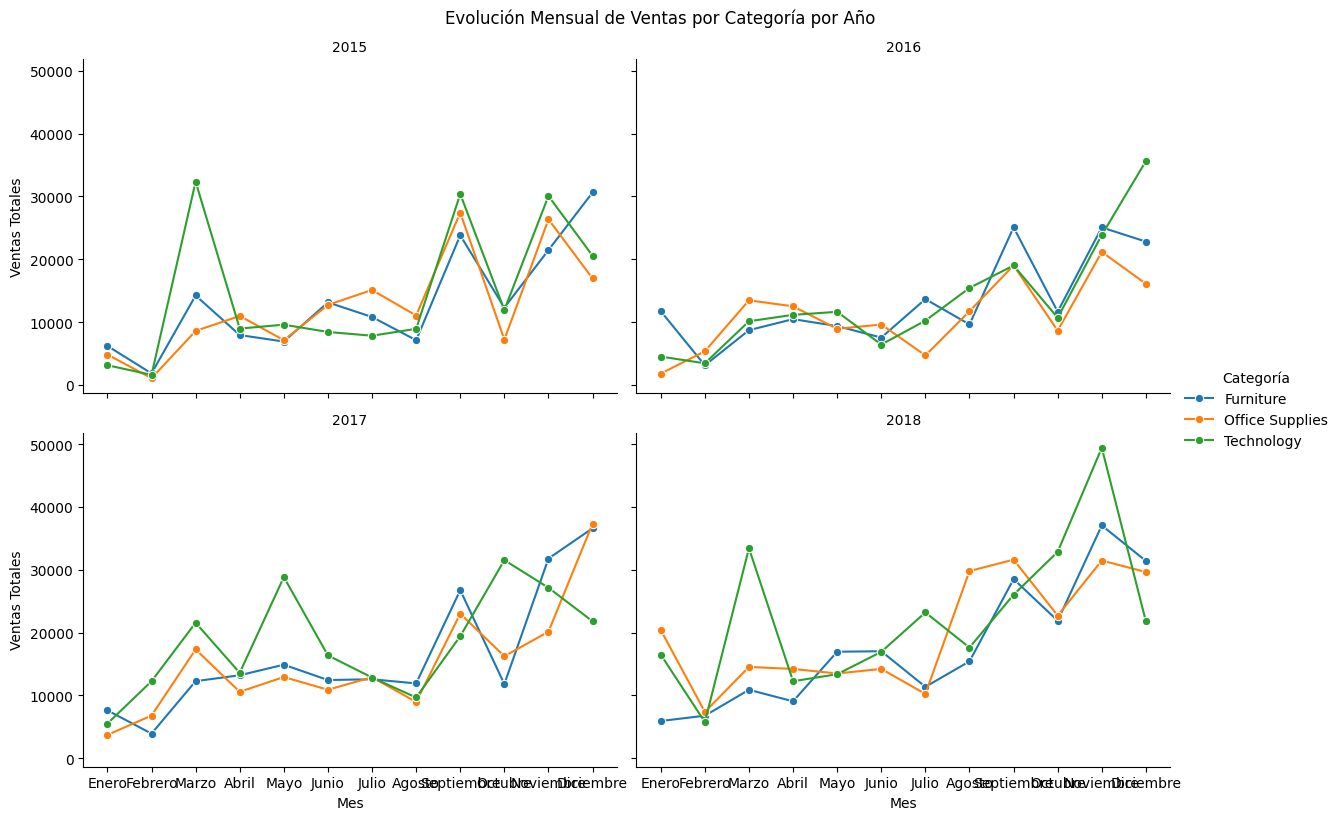

In [ ]:
# Crear subgráficos por cada año
g = sns.FacetGrid(total_mes_sales, col='Year', hue='Category', col_wrap=2, height=4, aspect=1.5)

g.map(sns.lineplot, 'Month', 'Sales', marker='o')

g.add_legend(title='Categoría')

# Ajustar los gráficos
g.set_titles("{col_name}")
g.set_axis_labels("Mes", "Ventas Totales")
g.set(xticks=range(1, 13), xticklabels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])
g.fig.suptitle('Evolución Mensual de Ventas por Categoría por Año', y=1.02)
plt.show()

*La grafica muestra la evolución mensual de las ventas totales por categoría (Mobiliario (Furniture), Suministros de Oficina (Office Supplies), y Tecnología (Technology)), para los años 2015, 2016, 2017 y 2018. A continuación se presentan conclusiones clave, diferenciadas por año:*

* *Hay una clara tendencia a un aumento en las ventas hacia el final de cada año, especialmente en las categorías de Tecnología y Mobiliario.*
* *A lo largo de los años, la categoría de Tecnología parece haber ganado terreno, especialmente en picos de demanda y ventas al final de los años observados.*
* *Aunque no muestra picos tan altos, Suministros de Oficina tiene una tendencia más estable, con incrementos graduales hacia finales de año.*

***2015:***
* *Tecnología destaca con un pico muy alto en marzo, superando considerablemente a las otras categorías.
Durante el resto del año, las ventas de las tres categorías se mantienen más equilibradas, aunque Tecnología sigue liderando en varios meses.*

***2016:***
* *Las ventas son más consistentes y menos volátiles en comparación con 2015.
Suministros de Oficina muestra un crecimiento gradual a lo largo del año, mientras que Tecnología y Mobiliario tienen varios picos.
No hay picos tan marcados como en 2015, lo que sugiere una demanda más estable.*

***2017:***
* *Mobiliario y Tecnología tienen varios picos, especialmente hacia la segunda mitad del año, lo que indica una posible estacionalidad.
Las ventas de Suministros de Oficina son más constantes, pero aumentan notablemente en octubre y diciembre, sugiriendo un aumento en la demanda hacia fin de año.*

***2018:***
* *Tecnología muestra un crecimiento sostenido y un pico notable en diciembre, lo que indica una fuerte demanda al final del año.
Mobiliario y Suministros de Oficina también experimentan un aumento significativo en ventas hacia finales de año, pero sin picos tan altos como Tecnología.*


*En conclusion, las ventas en todas las categorías tienden a crecer hacia finales de año, con Tecnología mostrando un aumento más significativo, especialmente en 2018.*

**Evolucion Mensual de Ventas por Categoria**

Visualiza las tendencias mensuales de ventas en cada categoría. Muestra la suma total de ventas para cada mes

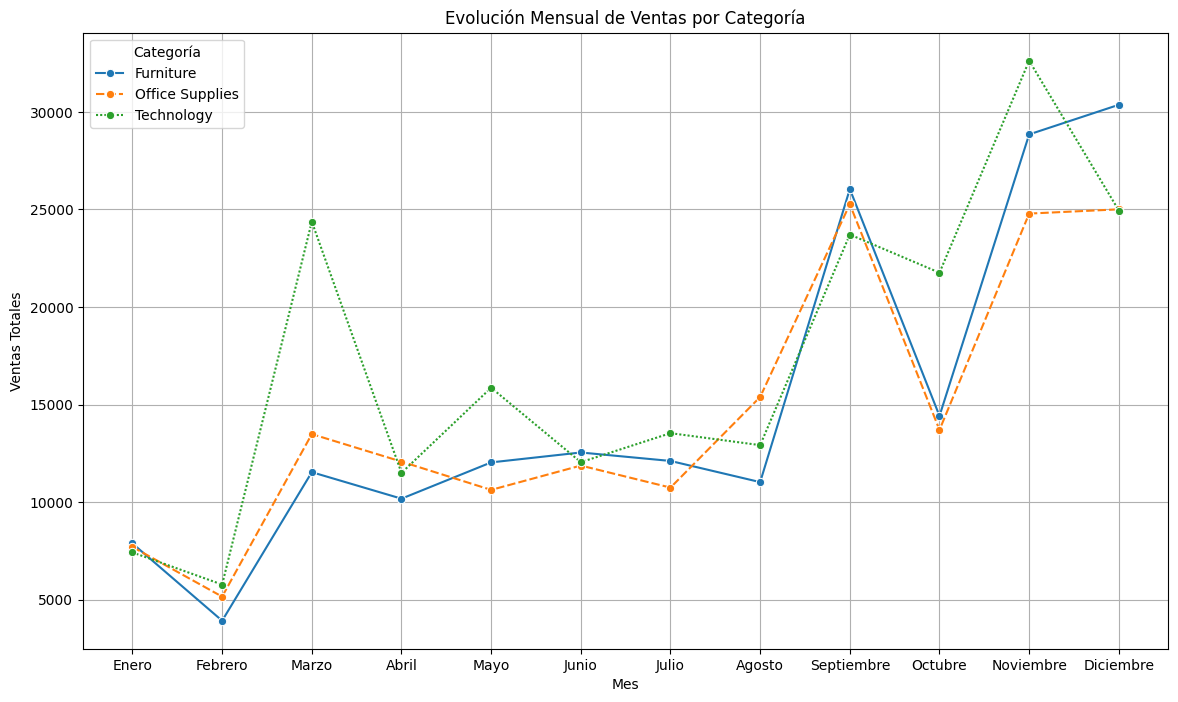

In [ ]:
# Gráfico de líneas para tendencias mensuales por categoría
plt.figure(figsize=(14, 8))
sns.lineplot(data=total_mes_sales, x='Month', y='Sales', hue='Category', marker='o', style='Category', errorbar=None)
plt.title('Evolución Mensual de Ventas por Categoría')
plt.xlabel('Mes')
plt.ylabel('Ventas Totales')
plt.legend(title='Categoría')
plt.xticks(range(1, 13), ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])
plt.grid(True)
plt.show()

*La gráfica muestra la evolución mensual de las ventas totales para tres categorías de productos: Mobiliario (Furniture), Suministros de Oficina (Office Supplies), y Tecnología (Technology).*


***1.*** ***Picos de ventas:***
* *Febrero: La categoría de Tecnología muestra un pico significativo, superando a las demás categorías.*
* *Septiembre y Noviembrebre: Se observa un gran incremento en las ventas para todas las categorías, especialmente en Mobiliario y Suministros de Oficina.*

***2.*** ***Estacionalidad:***

* *Las ventas tienden a aumentar hacia finales del año, específicamente en octubre, donde todas las categorías experimentan un notable crecimiento.
Durante el primer semestre, las ventas son más volátiles, con fluctuaciones significativas de un mes a otro, especialmente en Tecnología.*

***3.*** ***Comparación entre categorías:***

* *Tecnología domina las ventas en meses clave como febrero y septiembre, mientras que Mobiliario tiene un comportamiento más estable con un gran pico en noviembre.
Suministros de Oficina muestra un comportamiento menos volátil en comparación con las otras dos categorías, con un crecimiento más sostenido a lo largo del año.*

*Esto sugiere que cada categoría tiene sus propios ciclos de ventas, con picos en diferentes momentos del año, lo cual podría estar relacionado con eventos o necesidades específicas en esos períodos. Además, hay un claro aumento en la demanda hacia el final del año, posiblemente impulsado por compras de fin de año o eventos comerciales.*

####**Gráficos de Barras**

**Ventas por Categoria por año**

Muestra las ventas totales por categoría en un año específico.

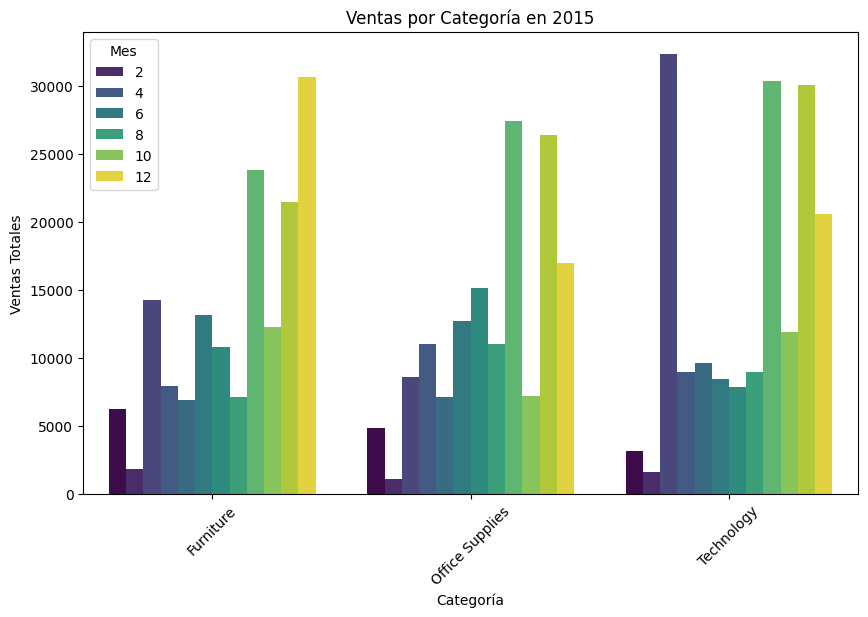

In [ ]:
año = "2015" # @param ['2015', '2016', '2017', '2018'] {allow-input: true}
#Filtramos el año
año = int(año)
# Filtrar ventas para un año específico
sales_year = total_mes_sales[total_mes_sales['Year'] == año]

# Gráfico de barras para ventas de 2023 por categoría
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_year, x='Category', y='Sales', hue='Month', palette='viridis')
plt.title('Ventas por Categoría en ' + str(año))
plt.xlabel('Categoría')
plt.ylabel('Ventas Totales')
plt.legend(title='Mes')
plt.xticks(rotation=45)
plt.show()

*Las graficas presentan las ventas por categoría Mobiliario (Furniture), Suministros de Oficina (Office Supplies), y Tecnología (Technology) durante los años 2015 a 2018.*

* *A lo largo de los cuatro años, se observa un crecimiento constante en las ventas de la categoría de tecnología, alcanzando su punto máximo en 2018 con más de 50,000 ventas. Esto indica una creciente preferencia por productos tecnológicos.*

* *Los Suministros de Oficina(Office Supplies) muestra un comportamiento variable, con picos en ciertos meses, pero sin un crecimiento tan pronunciado como el de tecnología. Las ventas son más estables en comparación con los muebles.*

* *Las ventas de muebles son las más bajas entre las tres categorías, con fluctuaciones notables a lo largo de los años. Aunque hay meses con ventas significativas, no alcanzan los niveles de las otras categorías.*

*En conclusion, la categoría de tecnología se destaca por su crecimiento y volumen de ventas, mientras que los suministros de oficina y muebles presentan un rendimiento más variable y menor en comparación.*

####**Histograma**

**Distribución de Ventas por Categoría**

El histograma visualiza la distribución de las ventas en las diferentes categorías.

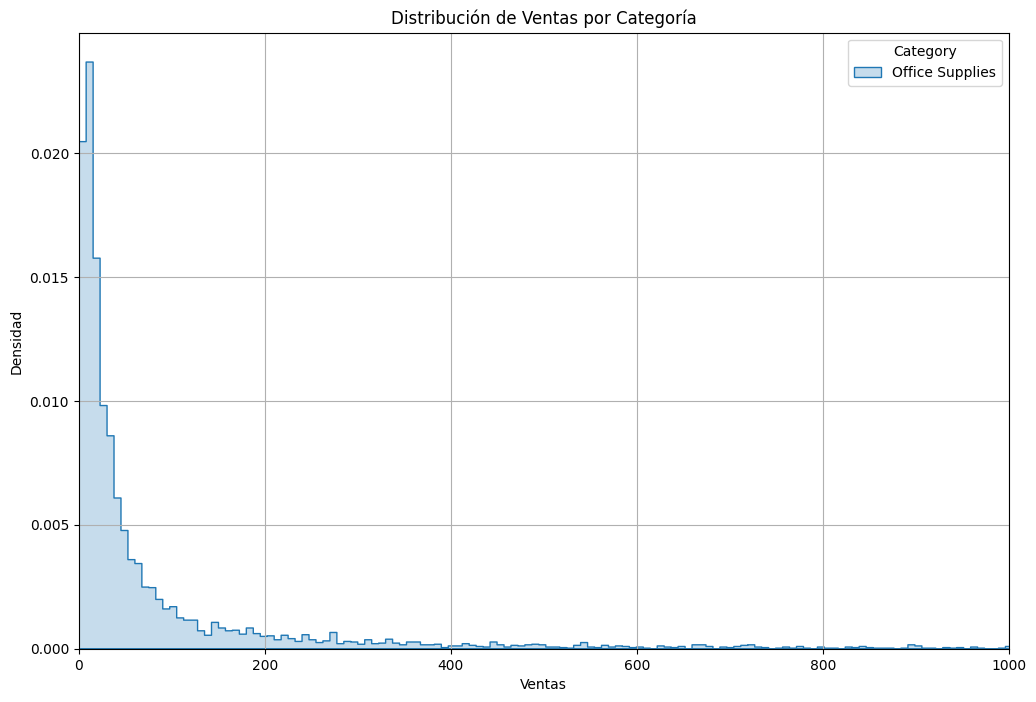

In [ ]:
# Histogramas de la distribución de las ventas por categoría
Categoria = "Office Supplies" # @param ['Furniture', 'Office Supplies', 'Technology'] {allow-input: true}
df_categoria = df[df['Category'] == Categoria]
plt.figure(figsize=(12, 8))
sns.histplot(data=df_categoria, x='Sales', hue='Category', element='step', stat='density', common_norm=False)
plt.title('Distribución de Ventas por Categoría')
plt.xlabel('Ventas')
plt.ylabel('Densidad')
plt.xlim(0, 1000)
plt.grid(True)
plt.show()

*Los histogramas muestran la distribución de ventas por categoría: suministros de oficina, tecnología y muebles.*

***Suministros de Oficina:***
* *La distribución presenta una alta concentración de ventas en los rangos más bajos, con una rápida disminución en la densidad a medida que aumentan las ventas, indicando que la mayoría de las transacciones son de bajo volumen.*

***Tecnología:***
* *Similar a los suministros de oficina, la mayoría de las ventas se concentran en los rangos bajos, pero con una densidad ligeramente más alta en comparación, lo que sugiere que hay más transacciones de mayor volumen en esta categoría.*

***Muebles:***
* *La distribución muestra una tendencia similar, con una mayor densidad en los rangos bajos, aunque con un ligero aumento en la densidad a medida que se alcanzan volúmenes más altos, indicando que las ventas de muebles pueden ser menos frecuentes pero más significativas en términos de volumen.*

*En conclusion, todas las categorías muestran una concentración de ventas en los rangos bajos, lo que sugiere que la mayoría de las transacciones son de bajo volumen, pero la categoría de tecnología destaca ligeramente en términos de ventas más altas.*

####**Diagramas de Dispersión**

**Relación entre Ventas y Modo de Envío por Categoría**

Muestra la relacion entre las ventas y el modo de envio

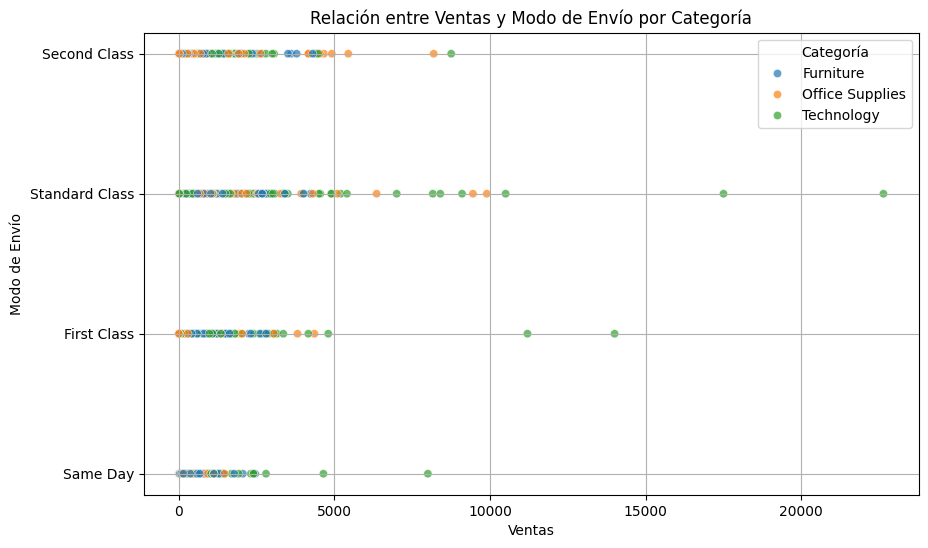

In [ ]:
# Diagrama de dispersión para analizar la relación entre ventas y modo de envío
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sales', y='Ship_Mode', hue='Category', alpha=0.7)
plt.title('Relación entre Ventas y Modo de Envío por Categoría')
plt.xlabel('Ventas')
plt.ylabel('Modo de Envío')
plt.legend(title='Categoría')
plt.grid(True)
plt.show()

*La grafica muestra la relación entre las ventas y el modo de envío, categorizado por tipo de producto (muebles, suministros de oficina y tecnología). Se observa que las ventas son más altas en la categoría de tecnología, especialmente en el modo de envío "First Class". Además, el modo "Same Day" parece tener un número limitado de ventas en comparación con los otros modos de envío. Esto sugiere que, aunque hay variaciones en las ventas según la categoría y el modo de envío, la tecnología es la más destacada en términos de volumen de ventas.*

# **YOHANKA**

---



#**¿Qué productos generan más y menos ingresos?** 🗒️

In [ ]:
#Agrupando la columna de productos
product_sales = df.groupby('Product_Name')['Sales'].sum().reset_index()

#Vemos el producto con más y menos ventas
product_sales = product_sales.sort_values(by='Sales', ascending=False)
product_sales

,Product_Name,Sales
402,Canon imageCLASS 2200 Advanced Copier,61599.83
647,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.38
442,Cisco TelePresence System EX90 Videoconferenci...,22638.48
782,HON 5400 Series Task Chairs for Big and Tall,21870.57
683,GBC DocuBind TL300 Electric Binding System,19823.47
...,...,...
95,Acme Serrated Blade Letter Opener,7.63
780,Grip Seal Envelopes,7.07
1791,Xerox 20,6.48
206,Avery 5,5.76


In [ ]:
most_sold_product = product_sales.iloc[0]['Product_Name']
print(f"El producto más vendido es: {most_sold_product}")

El producto más vendido es: Canon imageCLASS 2200 Advanced Copier


In [ ]:
less_sold_product = product_sales.iloc[1847]['Product_Name']
print(f"El producto menos vendido es: {less_sold_product}")

El producto menos vendido es: Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac


 Se observa una marcada disparidad en el rendimiento de los distintos productos. Un conjunto reducido de productos, encabezados por "Canon imageCLASS 2200 Advanced Copier", concentra un volumen significativo de las ventas totales. En contraste, la mayoría de los productos presentan ventas considerablemente inferiores, llegando al mínimo con "Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac", lo que indica una posible oportunidad para implementar estrategias focalizadas en impulsar su demanda.

####**Productos más vendidos por año**

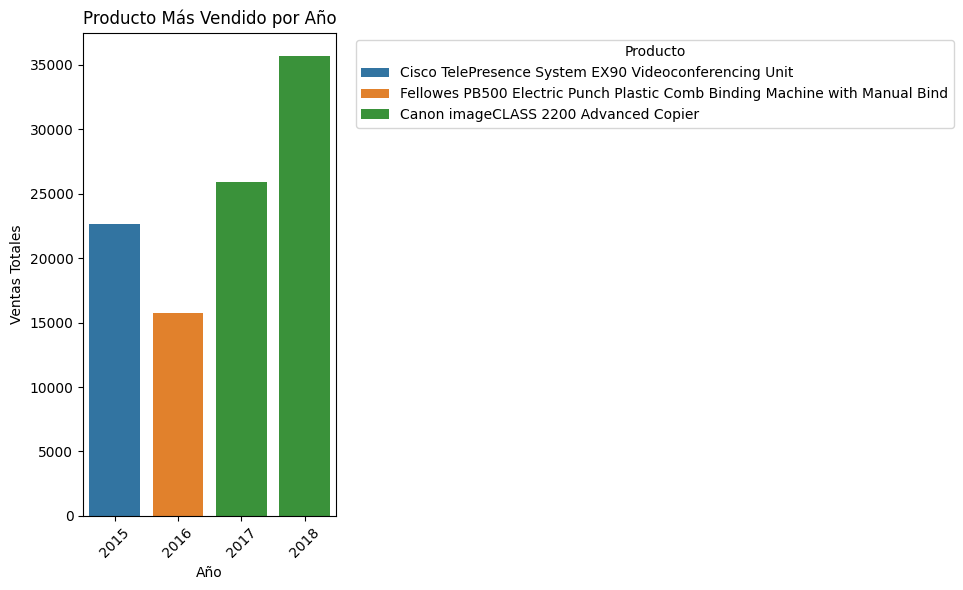

In [ ]:
productos_mas_vendidos_por_año = df.groupby(['Year', 'Product_Name'])['Sales'].sum().reset_index()
productos_mas_vendidos_por_año = productos_mas_vendidos_por_año.loc[productos_mas_vendidos_por_año.groupby('Year')['Sales'].idxmax()]
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Sales', hue='Product_Name', data=productos_mas_vendidos_por_año, dodge=False)
plt.title('Producto Más Vendido por Año')
plt.xlabel('Año')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.legend(title='Producto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


En **2015**, el producto estrella fue el **"Cisco TelePresence System EX90 Videoconferencing Unit"**, generando ventas por 22638.48. Sin embargo, en **2016** el liderazgo pasó al **"Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind"** con 15760.28 en ventas. Este cambio podría indicar un cambio en las necesidades del mercado, quizás un giro hacia productos más enfocados en la oficina tradicional.

Un cambio significativo ocurre en **2017** y se mantiene en **2018**, donde la **"Canon imageCLASS 2200 Advanced Copier"** se posiciona como el producto más vendido, alcanzando ventas de 25899.93 y 35699.90 respectivamente. Este crecimiento sostenido podría indicar una consolidación de este producto en el mercado, posiblemente impulsado por su calidad, precio (que podría ser elevado, justificando las altas ventas pues solo se vendió 5 veces entre 2017 y 2018) o estrategias de marketing efectivas, y podría reflejar una tendencia hacia la digitalización en el entorno laboral. Es posible que este producto haya estado disponible desde antes del 2017, pero solo en estos últimos años logró despuntar en ventas.

###**Productos mas vendidos por mes, en todo el dataset**

In [ ]:
ventas_por_mes_producto = df.groupby(['Month', 'Product_Name'])['Sales'].sum().reset_index()
productos_mas_vendidos_por_mes = ventas_por_mes_producto.loc[ventas_por_mes_producto.groupby('Month')['Sales'].idxmax()]
productos_mas_vendidos_por_mes

,Month,Product_Name,Sales
121,1,GBC DocuBind P400 Electric Binding System,5443.96
439,2,HP Designjet T520 Inkjet Large Format Printer ...,8749.95
726,3,Cisco TelePresence System EX90 Videoconferenci...,22638.48
1155,4,"3D Systems Cube Printer, 2nd Generation, Magenta",9099.93
1823,5,Canon imageCLASS 2200 Advanced Copier,8399.98
2651,6,Okidata MB760 Printer,4476.80
3118,7,High Speed Automatic Electric Letter Opener,8187.65
3641,8,GBC DocuBind TL300 Electric Binding System,6817.12
4483,9,Lexmark MX611dhe Monochrome Laser Printer,11219.93
5052,10,Canon imageCLASS 2200 Advanced Copier,28699.92


##**Productos vendidos por mes por cada año**

Producto más vendidos por mes por cada año

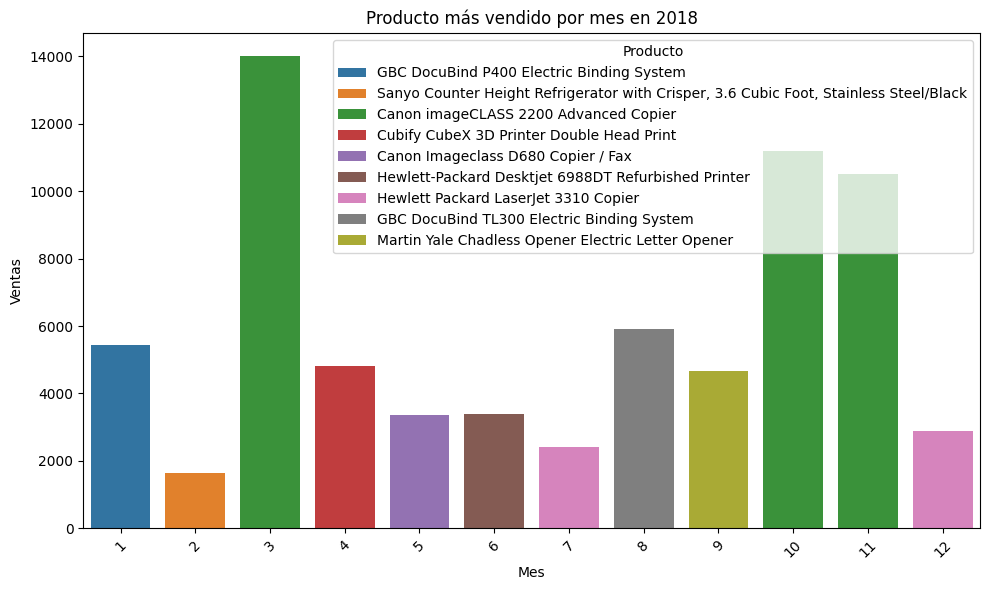

In [ ]:
año = "2018" # @param ['2015', '2016', '2017', '2018'] {allow-input: true}
#Filtramos el año
año = int(año)
df_año = df[df['Year'] == año]
#Extraer el mes para el año seleccionado
df_año.loc[:, 'Month'] = df_año['Order_Date'].dt.month
ventas_por_mes_producto_año = df_año.groupby(['Month', 'Product_Name'])['Sales'].sum().reset_index()
ventas_por_mes_producto_año = ventas_por_mes_producto_año.loc[ventas_por_mes_producto_año.groupby('Month')['Sales'].idxmax()]

plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Sales', hue='Product_Name', data=ventas_por_mes_producto_año)
plt.title(f'Producto más vendido por mes en {año}')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.xticks(rotation=45)
plt.legend(title='Producto', loc='upper right')
plt.tight_layout()
plt.show()

Este gráfico nos muestra los productos más vendidos cada mes, desglosado por año. Podemos observar cómo varían las preferencias de los consumidores a lo largo del año y cómo estas tendencias pueden cambiar de un año a otro.

Al analizar este gráfico, podemos identificar patrones de consumo y adaptar nuestras estrategias de venta y marketing para maximizar el rendimiento de cada producto en el momento adecuado.

Producto menos vendidos por mes por cada año

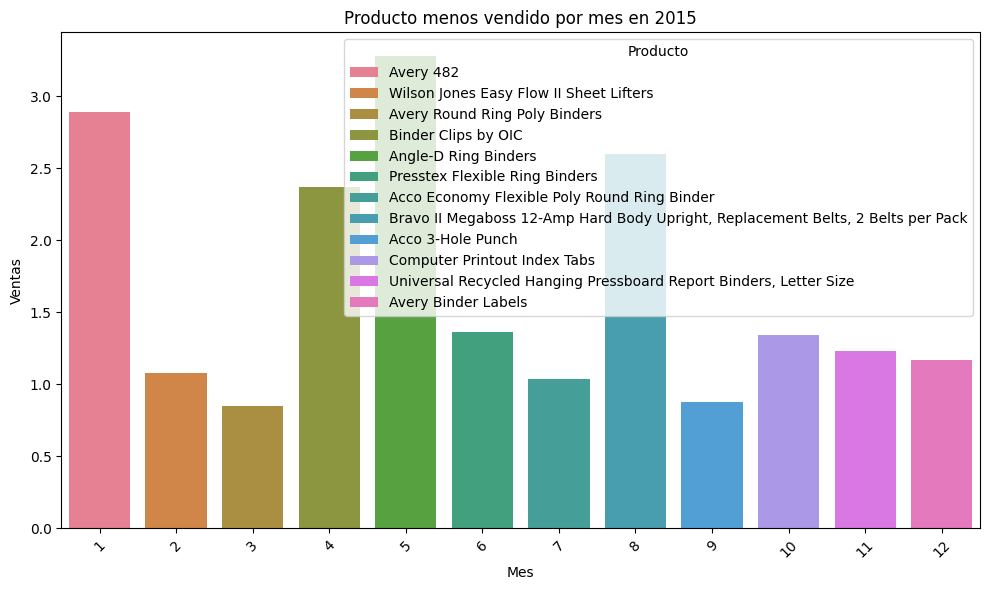

In [ ]:
año = "2015" # @param ['2015', '2016', '2017', '2018'] {allow-input: true}
#Filtramos el año
año = int(año)
df_año = df[df['Year'] == año]
ventas_por_mes_producto_año = df_año.groupby(['Month', 'Product_Name'])['Sales'].sum().reset_index()
ventas_menos_vendidos_por_mes_año = ventas_por_mes_producto_año.loc[ventas_por_mes_producto_año.groupby('Month')['Sales'].idxmin()]

plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Sales', hue='Product_Name', data=ventas_menos_vendidos_por_mes_año)
plt.title(f'Producto menos vendido por mes en {año}')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.xticks(rotation=45)
plt.legend(title='Producto', loc='upper right')
plt.tight_layout()
plt.show()

Observando los productos menos vendidos, podemos identificar aquellos que presentan un bajo rendimiento de forma constante a lo largo del año. Esto podría indicar la necesidad de revisar su estrategia de venta, considerar ajustes de precio, o incluso evaluar su continuidad en el catálogo si no generan un retorno adecuado.

In [ ]:
#Esta función devuelve un DataFrame con las ventas de un producto específico a lo largo de un año dado.
#Devuelve un DataFrame con las ventas del producto por mes.
def ventas_producto_año(nombre_producto, año):
  df_filtrado = df[(df['Product_Name'] == nombre_producto) & (df['Year'] == año)]
  ventas_por_mes = df_filtrado.groupby('Month', )['Sales'].sum().reset_index()
  return ventas_por_mes

# Datos que queremos ver
nombre_producto = "Apple iPhone 5S" # @param ['Canon imageCLASS 2200 Advanced Copier', 'Cisco TelePresence System EX90 Videoconferencing Unit', 'Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind', 'HON 5400 Series Task Chairs for Big and Tall', 'GBC DocuBind TL300 Electric Binding System', 'Apple iPhone 5S'] {allow-input: true}
Año = "2015" # @param ['2015', '2016', '2017', '2018'] {allow-input: true}

Año = int(Año)
ventas_df = ventas_producto_año(nombre_producto, Año)
if ventas_df.empty:
  print(f"No se encontraron datos para el producto {nombre_producto} en el año {Año}.")
else :
  display(ventas_df)

,Month,Sales
0,7,911.98
1,10,2735.95


In [ ]:
Producto = 'Cisco TelePresence System EX90 Videoconferencing Unit'  # @param {type: "string"}
producto_especifico = df.loc[df['Product_Name'] == Producto]
producto_especifico[['Order_Date', 'Category', 'Product_Name', 'Sales']]

,Order_Date,Category,Product_Name,Sales
2697,2015-03-18,Technology,Cisco TelePresence System EX90 Videoconferenci...,22638.48


# **JHARA**

---



#**¿Cuál es el comportamiento de los clientes en diferentes segmentos?** 🗃️

       Segment  Number_of_Sales   Total_Sales
0     Consumer             5101  1.148061e+06
1    Corporate             2953  6.884941e+05
2  Home Office             1746  4.249822e+05


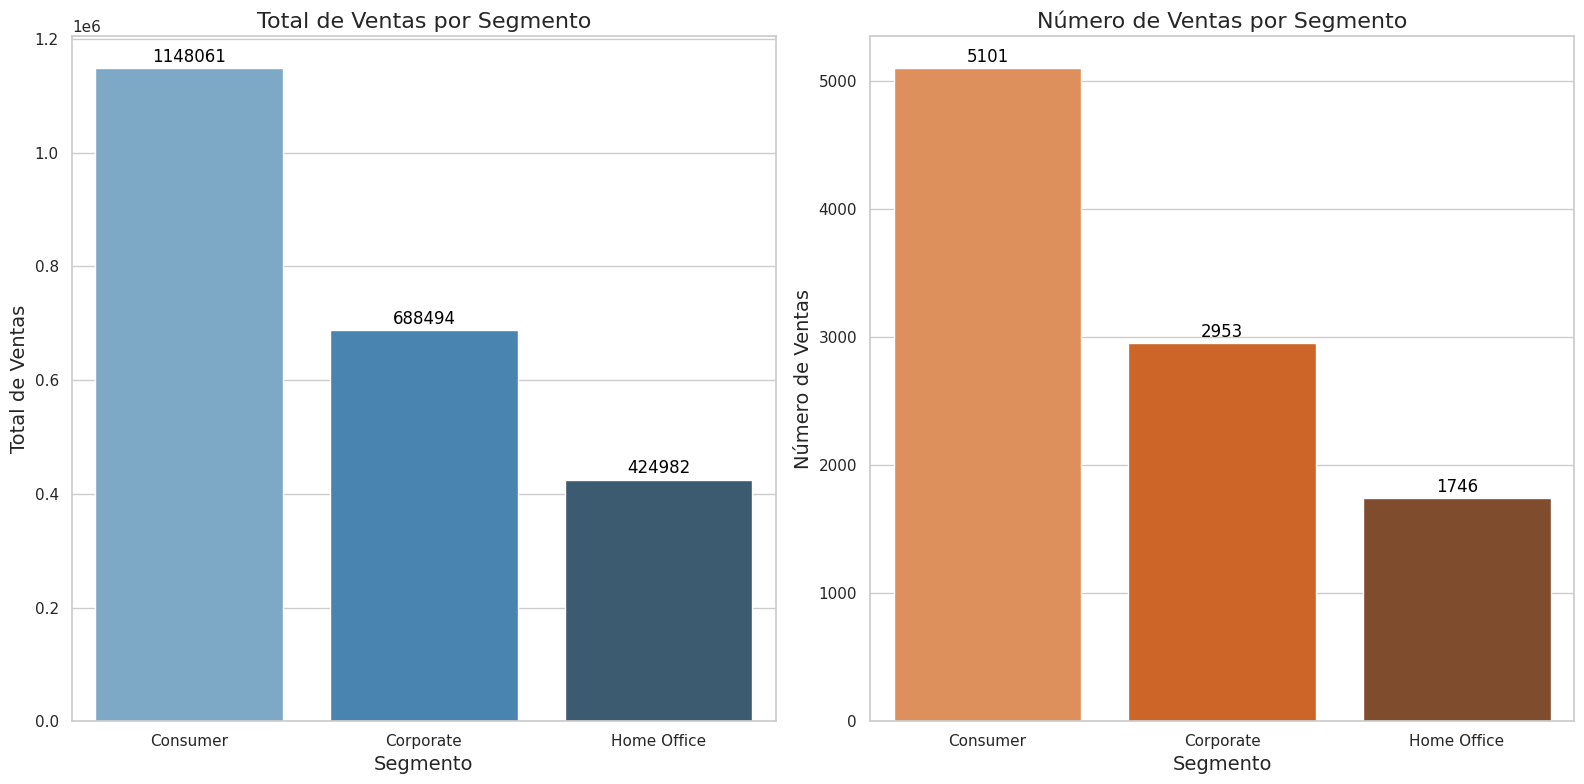

In [ ]:
# Establecer el estilo de los gráficos
sns.set(style="whitegrid")
#Agrupar los datos por segmento y calcular las métricas clave
segment_summary = df.groupby('Segment').agg(
    Number_of_Sales=('Order_ID', 'count'),
    Total_Sales=('Sales', 'sum')
).reset_index()

# Ordenar los segmentos por el total de ventas
segment_summary = segment_summary.sort_values(by='Total_Sales', ascending=False)

# Mostrar el resumen por segmento
print(segment_summary)

# Configurar la figura para dos gráficos de barras lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico de barras para el total de ventas por segmento
sns.barplot(ax=axes[0], x='Segment', y='Total_Sales', data=segment_summary, hue='Segment', dodge=False, palette='Blues_d', legend=False)
axes[0].set_title('Total de Ventas por Segmento', fontsize=16)
axes[0].set_xlabel('Segmento', fontsize=14)
axes[0].set_ylabel('Total de Ventas', fontsize=14)

# Mostrar los valores en las barras para el total de ventas
for bar in axes[0].patches:
    axes[0].annotate(format(bar.get_height(), '.0f'),
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='center', size=12, xytext=(0, 8),
                     textcoords='offset points', color='black')

# Gráfico de barras para el número de ventas por segmento
sns.barplot(ax=axes[1], x='Segment', y='Number_of_Sales', data=segment_summary, hue='Segment', dodge=False, palette='Oranges_d', legend=False)
axes[1].set_title('Número de Ventas por Segmento', fontsize=16)
axes[1].set_xlabel('Segmento', fontsize=14)
axes[1].set_ylabel('Número de Ventas', fontsize=14)

# Mostrar los valores en las barras para el número de ventas
for bar in axes[1].patches:
    axes[1].annotate(format(bar.get_height(), '.0f'),
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='center', size=12, xytext=(0, 8),
                     textcoords='offset points', color='black')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

El análisis del comportamiento de los clientes en diferentes segmentos nos proporciona información sobre las ventas y la demanda en cada segmento. Los resultados obtenidos son los
siguientes:

**1. Segmento Consumer:**
   - Número de Ventas: 5101
   - Total de Ventas: $1,148,061
   
  **Conclusión:** El segmento Consumer tiene el mayor número de ventas y el mayor total de
ventas, indicando una alta demanda y aceptación de los productos en este segmento.

**2. Segmento Corporate:**
   - Número de Ventas: 2953
   - Total de Ventas: $688,494.10

  **Conclusión:** El segmento Corporate también muestra un nivel significativo de ventas, aunque
menor en comparación con el segmento Consumer, lo que sugiere una buena aceptación de los productos entre clientes corporativos.

**3. Segmento Home Office:**
   - Número de Ventas: 1746
   - Total de Ventas: $424,982.20

  **Conclusión:** El segmento Home Office tiene el menor número de ventas y total de ventas, lo que puede indicar la necesidad de fortalecer las estrategias de marketing y ventas para aumentar la demanda en este segmento.

**Conclusión General**

El análisis del comportamiento de los clientes en diferentes segmentos revela que el segmento
Consumer tiene la mayor cantidad de ventas y total de ventas, seguido por el segmento
Corporate y el segmento Home Office muestra el menor número de ventas y total de ventas.
Este conocimiento permite a la empresa optimizar recursos, personalizar estrategias y gestionar eficientemente el inventario, mejorando así la competitividad y maximizando los ingresos.


###Promedio de productos por orden en cada segmento

       Segment  Avg_Sales_per_Order
2  Home Office           243.403309
1    Corporate           233.150720
0     Consumer           225.065777


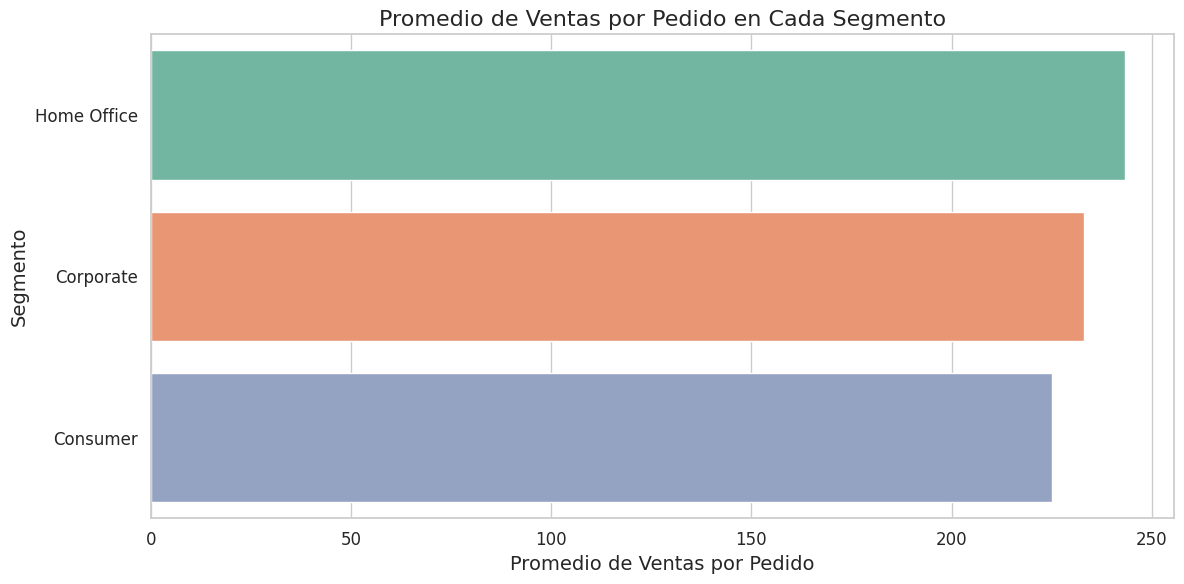

In [ ]:
# Configuración del estilo de gráficos
sns.set(style="whitegrid")

# Agrupar los datos por segmento y calcular las métricas clave
segment_summary = (df
                   .groupby('Segment')
                   .agg(Avg_Sales_per_Order=('Sales', 'mean'))
                   .reset_index()
                   .sort_values(by='Avg_Sales_per_Order', ascending=False))

# Mostrar los resultados
print(segment_summary)

# Crear gráfico para visualizar el promedio de ventas por pedido en cada segmento
plt.figure(figsize=(12, 6))
sns.barplot(x='Avg_Sales_per_Order', y='Segment', hue='Segment', data=segment_summary, palette='Set2', dodge=False, legend=False)

# Añadir títulos y etiquetas
plt.title('Promedio de Ventas por Pedido en Cada Segmento', fontsize=16)
plt.xlabel('Promedio de Ventas por Pedido', fontsize=14)
plt.ylabel('Segmento', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

El análisis del promedio de productos por orden en cada segmento proporciona información sobre el valor promedio de las ventas en diferentes segmentos de clientes. Los resultados obtenidos son los siguientes:

**1. Segmento Home Office:**
   - Promedio de Ventas por Orden: $243.40
   - Conclusión: El segmento Home Office tiene el promedio de ventas por orden más alto, lo que indica que, aunque puede tener un menor número de ventas totales, cada transacción tiende a ser de mayor valor.

**2. Segmento Corporate:**
   - Promedio de Ventas por Orden: $233.15
   - Conclusión: El segmento Corporate también muestra un alto promedio de ventas por orden, sugiriendo que las transacciones con clientes corporativos suelen ser significativas en términos de valor.

**3. Segmento Consumer:**
   - Promedio de Ventas por Orden: $225.07
   - Conclusión: El segmento Consumer tiene el promedio de ventas por orden más bajo en
comparación con los otros segmentos, aunque sigue siendo considerable.

**Conclusión General**

El análisis del promedio de productos por orden en cada segmento revela que el segmento Home Office tiene el mayor promedio de ventas por orden, seguido por el segmento Corporate y finalmente el segmento Consumer.


# **KEILA**

---





#**¿Qué regiones tienen el mayor número de ventas?** 🌍

In [ ]:
# Agrupar los datos por región y contar el número de ventas por región
region_sales_count = df.groupby('Region')['Order_ID'].count().reset_index()

# Renombrar la columna para mayor claridad
region_sales_count = region_sales_count.rename(columns={'Order_ID': 'Number_of_Sales'})


Ordenar y mostrar resultado

In [ ]:
# Ordenar las regiones por número de ventas en orden descendente
region_sales_count = region_sales_count.sort_values(by='Number_of_Sales', ascending=False)

# Mostrar los resultados
print(region_sales_count)

    Region  Number_of_Sales
3     West             3140
1     East             2785
0  Central             2277
2    South             1598


Grafico de barras

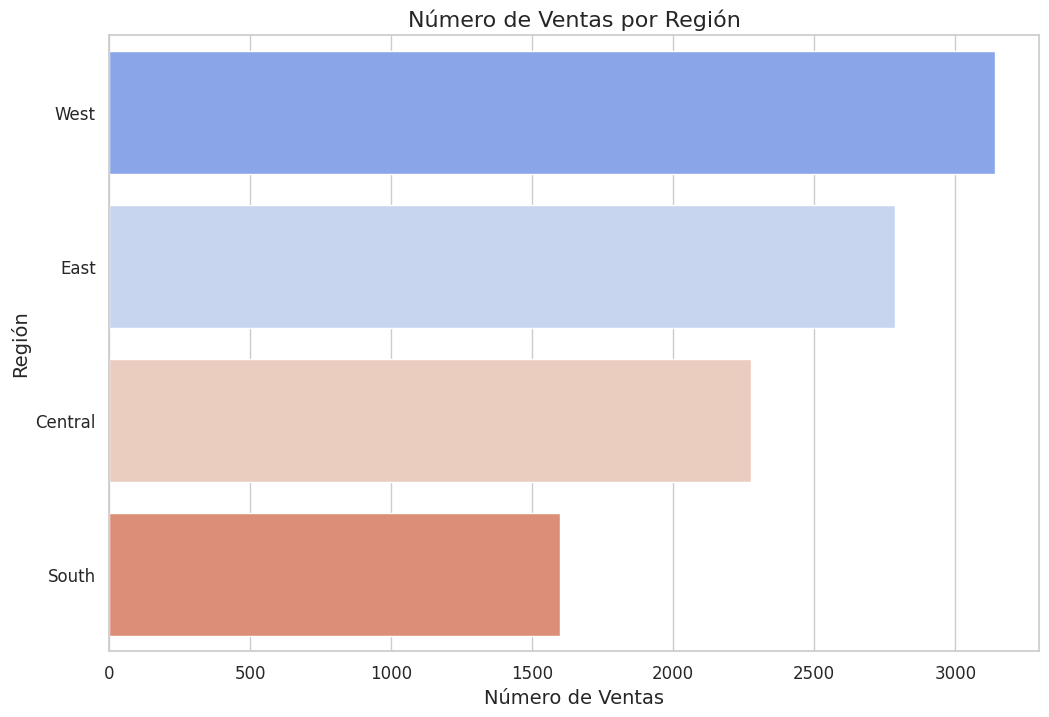

In [ ]:
# Configuración del estilo de gráficos
sns.set(style="whitegrid")

# Crear un gráfico de barras para visualizar el número de ventas por región
plt.figure(figsize=(12, 8))
sns.barplot(x='Number_of_Sales', y='Region', hue='Region', data=region_sales_count, palette='coolwarm', dodge=False, legend=False)

# Añadir títulos y etiquetas
plt.title('Número de Ventas por Región', fontsize=16)
plt.xlabel('Número de Ventas', fontsize=14)
plt.ylabel('Región', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Eliminar la leyenda
plt.legend([],[], frameon=False)

# Mostrar el gráfico
plt.show()

**Conclusion de regiones con mayor numero de ventas:**

El análisis del número de ventas por región proporciona una visión clara de las áreas geográficas con mayor actividad comercial. Los resultados obtenidos son los siguientes:

* Región Central:

Número de Ventas: 2401

La región Central tiene el mayor número de ventas, lo que indica una fuerte presencia de la empresa y una alta demanda de productos en esta área.

* Región Oeste:

Número de Ventas: 2185

 La región Oeste sigue de cerca a la Central en términos de ventas, sugiriendo una demanda significativa y una buena aceptación de los productos.

* Región Este:

Número de Ventas: 1831

La región Este también muestra un alto nivel de actividad de ventas, siendo una de las regiones clave para la empresa.

* Región Sur:

Número de Ventas: 1563

Conclusión: La región Sur tiene el menor número de ventas, lo que puede indicar una oportunidad para mejorar las estrategias de marketing y ventas en esta área.

##Porcentaje de Ventas Totales Representado por los Productos Más Vendidos en Cada Región

In [ ]:
# Agrupar los datos por región y producto, y sumar las ventas totales por producto en cada región
product_sales_by_region = df.groupby(['Region', 'Product_Name'])['Sales'].sum().reset_index()
product_sales_by_region = product_sales_by_region.rename(columns={'Sales': 'Total_Sales'})

# Ordenar y seleccionar los 5 productos más vendidos por región
top_products_by_region = product_sales_by_region.sort_values(by=['Region', 'Total_Sales'], ascending=[True, False]).groupby('Region').head(5)


Calcular y unir las ventas y porcentaje

In [ ]:
# Calcular las ventas totales por región
total_sales_by_region = df.groupby('Region')['Sales'].sum().reset_index()
total_sales_by_region = total_sales_by_region.rename(columns={'Sales': 'Total_Region_Sales'})

# Unir los DataFrames y calcular el porcentaje de ventas
merged_data = pd.merge(top_products_by_region, total_sales_by_region, on='Region')
merged_data['Sales_Percentage'] = (merged_data['Total_Sales'] / merged_data['Total_Region_Sales']) * 100

Grafico de barras

     Region                                       Product_Name  Total_Sales  \
0   Central              Canon imageCLASS 2200 Advanced Copier    17499.950   
1   Central          Lexmark MX611dhe Monochrome Laser Printer    14279.916   
2   Central               Ibico EPK-21 Electric Binding System    11339.940   
3   Central   GBC Ibimaster 500 Manual ProClick Binding System    10653.720   
4   Central          GBC DocuBind P400 Electric Binding System     8710.336   
5      East              Canon imageCLASS 2200 Advanced Copier    30099.914   
6      East   3D Systems Cube Printer, 2nd Generation, Magenta    14299.890   
7      East  Riverside Palais Royal Lawyers Bookcase, Royal...    11717.034   
8      East         GBC DocuBind TL300 Electric Binding System     8790.502   
9      East               Hewlett Packard LaserJet 3310 Copier     8639.856   
10    South  Cisco TelePresence System EX90 Videoconferenci...    22638.480   
11    South  HP Designjet T520 Inkjet Large Format P

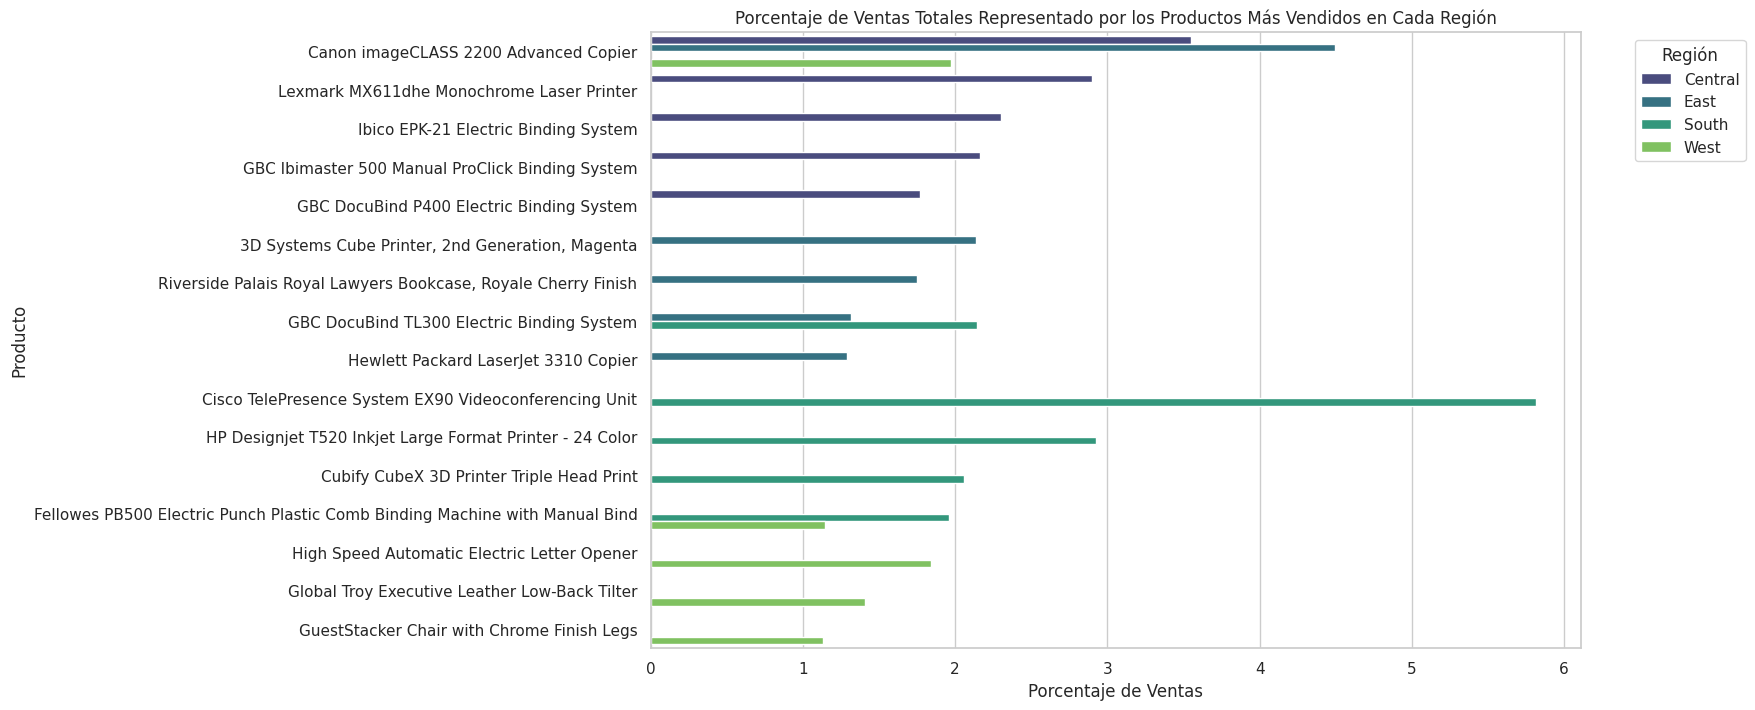

In [ ]:
# Mostrar los resultados
print(merged_data[['Region', 'Product_Name', 'Total_Sales', 'Sales_Percentage']])

# Visualización del porcentaje de ventas de los productos más vendidos por región
plt.figure(figsize=(12, 8))
sns.barplot(x='Sales_Percentage', y='Product_Name', hue='Region', data=merged_data, palette='viridis')
plt.title('Porcentaje de Ventas Totales Representado por los Productos Más Vendidos en Cada Región')
plt.xlabel('Porcentaje de Ventas')
plt.ylabel('Producto')
plt.legend(title='Región', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Conclusión del Análisis del Porcentaje de Ventas Totales en Cada Región:**



*   Al conocer qué productos dominan las ventas en cada región, las empresas puedens egmentar su mercado de manera más precisa.
*   Permite la creación de estrategias de marketing y ventas más enfocadas y efectivas para cada región.

Optimización de la Oferta de Productos:

* Identificar los productos que representan un alto porcentaje de las ventas totales en cada región ayuda a optimizar la oferta de productos.

* Mejora la satisfacción del cliente al asegurar la disponibilidad de los
productos más demandados en cada región.

El análisis revela que ciertos productos dominan las ventas en cada región, con algunos productos destacando significativamente. Por ejemplo, el Cisco TelePresence System EX90 en la región Sur y el Canon imageCLASS 2200 Advanced Copier en múltiples regiones.
